In [14]:
import mysql.connector 
import pandas as pd

In [15]:

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="04101998",
  database="gravity_books"
)

mycursor = mydb.cursor()
mycursor.execute("SHOW tables")

In [16]:
for x in mycursor:
  print(x)

('address',)
('address_status',)
('author',)
('book',)
('book_author',)
('book_language',)
('country',)
('cust_order',)
('customer',)
('customer_address',)
('order_history',)
('order_line',)
('order_status',)
('publisher',)
('shipping_method',)


In [17]:
query1 = "SELECT * FROM cust_order"
query2 = "SELECT * FROM customer"
query3 = "SELECT * FROM book"
query4 = "SELECT * FROM shipping_method"
query5 = "SELECT * FROM order_line"


In [18]:
cust_order_df= pd.read_sql(query1,con=mydb)
customer_df=pd.read_sql(query2,con=mydb)
book_df=pd.read_sql(query3,con=mydb)
shipping_method_df=pd.read_sql(query4,con=mydb)
order_line_df=pd.read_sql(query5,con=mydb)

C:\Users\rmari\AppData\Local\Temp\ipykernel_2068\3032530511.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cust_order_df= pd.read_sql(query1,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_2068\3032530511.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_df=pd.read_sql(query2,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_2068\3032530511.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  book_df=pd.read_sql(query3,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_2068\3032530511.py:4: UserW

In [19]:
cust_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            7550 non-null   int64         
 1   order_date          7550 non-null   datetime64[ns]
 2   customer_id         7550 non-null   int64         
 3   shipping_method_id  7550 non-null   int64         
 4   dest_address_id     7550 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 295.1 KB


In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2000 non-null   int64 
 1   first_name   2000 non-null   object
 2   last_name    2000 non-null   object
 3   email        2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [21]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           11127 non-null  int64 
 1   title             11127 non-null  object
 2   isbn13            11127 non-null  object
 3   language_id       11127 non-null  int64 
 4   num_pages         11127 non-null  int64 
 5   publication_date  11127 non-null  object
 6   publisher_id      11127 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 608.6+ KB


In [22]:
shipping_method_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   method_id    4 non-null      int64  
 1   method_name  4 non-null      object 
 2   cost         4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [23]:
order_line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   line_id   15400 non-null  int64  
 1   order_id  15400 non-null  int64  
 2   book_id   15400 non-null  int64  
 3   price     15400 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 481.4 KB


In [24]:
cust_order_df.to_csv("cust_order.csv",index=False)
customer_df.to_csv("customer.csv",index=False)
book_df.to_csv("book.csv",index=False)
order_line_df.to_csv("order_line.csv",index=False)
shipping_method_df.to_csv("shipping_method.csv",index=False)

In [32]:
import pandas as pd

# Load datasets
book = pd.read_csv("D:/santhanam/FINEL/book.csv")
customer = pd.read_csv("D:/santhanam/FINEL/customer.csv")
cust_order = pd.read_csv("D:/santhanam/FINEL/cust_order.csv")
order_line = pd.read_csv("D:/santhanam/FINEL/order_line.csv")
shipping_method = pd.read_csv("D:/santhanam/FINEL/shipping_method.csv")

# -----------------------------
# 🔗 INNER JOIN merges
# -----------------------------

# 1. customer ⬅️➡️ cust_order  (on customer_id)
df = customer.merge(
    cust_order,
    on="customer_id",
    how="inner"
)

# 2. add order_line (on order_id)
df = df.merge(
    order_line,
    on="order_id",
    how="inner"
)

# 3. add book info (on book_id)
df = df.merge(
    book,
    on="book_id",
    how="inner"
)

# 4. add shipping info
df = df.merge(
    shipping_method,
    left_on="shipping_method_id",
    right_on="method_id",
    how="inner"
)

# Drop duplicate key column
df = df.drop(columns=["method_id"])

print(df.head())
print(f"Final shape: {df.shape}")


   customer_id first_name last_name               email  order_id  \
0            1     Ursola     Purdy  upurdy0@cdbaby.com      1405   
1            1     Ursola     Purdy  upurdy0@cdbaby.com      1405   
2            1     Ursola     Purdy  upurdy0@cdbaby.com      1505   
3            1     Ursola     Purdy  upurdy0@cdbaby.com      5325   
4            1     Ursola     Purdy  upurdy0@cdbaby.com      5325   

            order_date  shipping_method_id  dest_address_id  line_id  book_id  \
0  2023-02-25 19:31:24                   4              235        1     1505   
1  2023-02-25 19:31:24                   4              235    14828     1145   
2  2023-12-17 11:56:21                   2               55        2     1389   
3  2023-12-07 20:25:34                   3              235        3     1705   
4  2023-12-07 20:25:34                   3              235    10463     8120   

   price                                              title         isbn13  \
0  10.12            

In [33]:
df

,customer_id,first_name,last_name,email,order_id,order_date,shipping_method_id,dest_address_id,line_id,book_id,price,title,isbn13,language_id,num_pages,publication_date,publisher_id,method_name,cost
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,1,1505,10.12,Don Quixote,9780142437230,1,1023,2003-02-25,1476,International,24.5
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,14828,1145,6.49,That Was Then This Is Now,9780140389661,2,159,1998-04-01,1867,International,24.5
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1505,2023-12-17 11:56:21,2,55,2,1389,2.11,The Woman in White,9780141439617,1,672,2003-02-27,1493,Priority,8.9
3,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,3,1705,8.99,The Female of the Species: Tales of Mystery an...,9780156030274,1,275,2007-01-15,1212,Express,11.9
4,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,10463,8120,14.11,Oprah Winfrey,9780822550006,1,128,2002-01-01,1126,Express,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,1999,Ardeen,Caret,acaretrq@wsj.com,10595,2022-11-20 16:56:25,1,74,14512,6276,14.99,Underworld,9780684848150,1,827,1998-07-09,1777,Standard,5.9
15396,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,7549,3748,19.14,The Languages of Tolkien's Middle-Earth,9780395291306,1,207,1980-05-28,986,Priority,8.9
15397,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,14763,340,19.70,Ready or Not (All-American Girl #2),9780060724504,1,238,2005-08-01,889,Priority,8.9
15398,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,7303,2022-11-15 21:01:01,3,477,7550,8617,0.02,Tales from the Dark Tower,9780967575605,2,282,2003-10-01,1288,Express,11.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         15400 non-null  int64  
 1   first_name          15400 non-null  object 
 2   last_name           15400 non-null  object 
 3   email               15400 non-null  object 
 4   order_id            15400 non-null  int64  
 5   order_date          15400 non-null  object 
 6   shipping_method_id  15400 non-null  int64  
 7   dest_address_id     15400 non-null  int64  
 8   line_id             15400 non-null  int64  
 9   book_id             15400 non-null  int64  
 10  price               15400 non-null  float64
 11  title               15400 non-null  object 
 12  isbn13              15400 non-null  int64  
 13  language_id         15400 non-null  int64  
 14  num_pages           15400 non-null  int64  
 15  publication_date    15400 non-null  object 
 16  publ

In [35]:
df.isnull().sum()

customer_id           0
first_name            0
last_name             0
email                 0
order_id              0
order_date            0
shipping_method_id    0
dest_address_id       0
line_id               0
book_id               0
price                 0
title                 0
isbn13                0
language_id           0
num_pages             0
publication_date      0
publisher_id          0
method_name           0
cost                  0
dtype: int64

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df

,customer_id,first_name,last_name,email,order_id,order_date,shipping_method_id,dest_address_id,line_id,book_id,price,title,isbn13,language_id,num_pages,publication_date,publisher_id,method_name,cost
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,1,1505,10.12,Don Quixote,9780142437230,1,1023,2003-02-25,1476,International,24.5
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,14828,1145,6.49,That Was Then This Is Now,9780140389661,2,159,1998-04-01,1867,International,24.5
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1505,2023-12-17 11:56:21,2,55,2,1389,2.11,The Woman in White,9780141439617,1,672,2003-02-27,1493,Priority,8.9
3,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,3,1705,8.99,The Female of the Species: Tales of Mystery an...,9780156030274,1,275,2007-01-15,1212,Express,11.9
4,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,10463,8120,14.11,Oprah Winfrey,9780822550006,1,128,2002-01-01,1126,Express,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,1999,Ardeen,Caret,acaretrq@wsj.com,10595,2022-11-20 16:56:25,1,74,14512,6276,14.99,Underworld,9780684848150,1,827,1998-07-09,1777,Standard,5.9
15396,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,7549,3748,19.14,The Languages of Tolkien's Middle-Earth,9780395291306,1,207,1980-05-28,986,Priority,8.9
15397,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,14763,340,19.70,Ready or Not (All-American Girl #2),9780060724504,1,238,2005-08-01,889,Priority,8.9
15398,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,7303,2022-11-15 21:01:01,3,477,7550,8617,0.02,Tales from the Dark Tower,9780967575605,2,282,2003-10-01,1288,Express,11.9


In [38]:
from scipy.stats import zscore

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate z-scores only for numeric columns
merged_df_z = df[numeric_cols].apply(zscore)

# Identify outliers in each numeric column (abs(z) > 3)
outliers = (merged_df_z.abs() > 3)


In [39]:
df

,customer_id,first_name,last_name,email,order_id,order_date,shipping_method_id,dest_address_id,line_id,book_id,price,title,isbn13,language_id,num_pages,publication_date,publisher_id,method_name,cost
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,1,1505,10.12,Don Quixote,9780142437230,1,1023,2003-02-25,1476,International,24.5
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1405,2023-02-25 19:31:24,4,235,14828,1145,6.49,That Was Then This Is Now,9780140389661,2,159,1998-04-01,1867,International,24.5
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1505,2023-12-17 11:56:21,2,55,2,1389,2.11,The Woman in White,9780141439617,1,672,2003-02-27,1493,Priority,8.9
3,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,3,1705,8.99,The Female of the Species: Tales of Mystery an...,9780156030274,1,275,2007-01-15,1212,Express,11.9
4,1,Ursola,Purdy,upurdy0@cdbaby.com,5325,2023-12-07 20:25:34,3,235,10463,8120,14.11,Oprah Winfrey,9780822550006,1,128,2002-01-01,1126,Express,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,1999,Ardeen,Caret,acaretrq@wsj.com,10595,2022-11-20 16:56:25,1,74,14512,6276,14.99,Underworld,9780684848150,1,827,1998-07-09,1777,Standard,5.9
15396,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,7549,3748,19.14,The Languages of Tolkien's Middle-Earth,9780395291306,1,207,1980-05-28,986,Priority,8.9
15397,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,869,2025-07-09 23:38:59,2,477,14763,340,19.70,Ready or Not (All-American Girl #2),9780060724504,1,238,2005-08-01,889,Priority,8.9
15398,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,7303,2022-11-15 21:01:01,3,477,7550,8617,0.02,Tales from the Dark Tower,9780967575605,2,282,2003-10-01,1288,Express,11.9


In [40]:
import pandas as pd

# Assuming your merged DataFrame is called df
df['order_date'] = pd.to_datetime(df['order_date'])

# Today's date (max in dataset for recency calculation)
today = df['order_date'].max()

# Aggregate customer-level metrics
customer_metrics = df.groupby("customer_id").agg(
    total_orders=("order_id", "nunique"),
    total_spend=("price", "sum"),
    avg_order_value=("price", lambda x: x.sum() / x.nunique()),
    purchase_frequency=("order_id", "count"),
    unique_books=("book_id", "nunique"),
    total_order_lines=("line_id", "count"),
    last_purchase=("order_date", "max"),
    avg_shipping_cost=("cost", "mean"),
    preferred_shipping=("method_name", lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
).reset_index()

# Recency (days since last purchase)
customer_metrics["recency_days"] = (today - customer_metrics["last_purchase"]).dt.days

# Drop timestamp column (we already have recency)
customer_metrics = customer_metrics.drop(columns=["last_purchase"])

print(customer_metrics.head())


   customer_id  total_orders  total_spend  avg_order_value  \
0            1             3        50.10         8.350000   
1            2             1        28.69        14.345000   
2            3             3        30.77         5.128333   
3            4             6       127.89         9.837692   
4            5             3        62.79        10.465000   

   purchase_frequency  unique_books  total_order_lines  avg_shipping_cost  \
0                   6             6                  6          15.600000   
1                   2             2                  2           5.900000   
2                   6             6                  6          15.600000   
3                  13            13                 13          16.053846   
4                   6             6                  6           8.900000   

  preferred_shipping  recency_days  
0            Express           596  
1           Standard           434  
2            Express           365  
3            Exp

In [41]:
customer_metrics.isnull().sum()

customer_id           0
total_orders          0
total_spend           0
avg_order_value       0
purchase_frequency    0
unique_books          0
total_order_lines     0
avg_shipping_cost     0
preferred_shipping    0
recency_days          0
dtype: int64

In [42]:
customer_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1962 non-null   int64  
 1   total_orders        1962 non-null   int64  
 2   total_spend         1962 non-null   float64
 3   avg_order_value     1962 non-null   float64
 4   purchase_frequency  1962 non-null   int64  
 5   unique_books        1962 non-null   int64  
 6   total_order_lines   1962 non-null   int64  
 7   avg_shipping_cost   1962 non-null   float64
 8   preferred_shipping  1962 non-null   object 
 9   recency_days        1962 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 153.4+ KB


In [43]:
pd.set_option('display.max_columns', None)

In [44]:
customer_metrics

,customer_id,total_orders,total_spend,avg_order_value,purchase_frequency,unique_books,total_order_lines,avg_shipping_cost,preferred_shipping,recency_days
0,1,3,50.10,8.350000,6,6,6,15.600000,Express,596
1,2,1,28.69,14.345000,2,2,2,5.900000,Standard,434
2,3,3,30.77,5.128333,6,6,6,15.600000,Express,365
3,4,6,127.89,9.837692,13,13,13,16.053846,Express,20
4,5,3,62.79,10.465000,6,6,6,8.900000,Express,3
...,...,...,...,...,...,...,...,...,...,...
1957,1996,4,39.32,7.864000,5,5,5,8.300000,Standard,40
1958,1997,2,50.70,12.675000,4,4,4,16.700000,International,913
1959,1998,2,10.42,5.210000,2,2,2,24.500000,International,970
1960,1999,11,283.95,10.921154,26,26,26,9.776923,Standard,52


In [45]:
# Basic statistics
print(customer_metrics.describe())

# Distribution of total spend
customer_metrics['total_spend'].describe()

# Count unique values
print("Unique Customers:", customer_metrics['customer_id'].nunique())
print("Preferred Shipping Methods:", customer_metrics['preferred_shipping'].value_counts())


       customer_id  total_orders  total_spend  avg_order_value  \
count  1962.000000   1962.000000  1962.000000      1962.000000   
mean    998.950051      3.848114    78.781978        10.018020   
std     576.945593      2.249000    51.583093         2.610131   
min       1.000000      1.000000     0.420000         0.210000   
25%     500.250000      2.000000    40.060000         8.472917   
50%     998.500000      3.000000    69.065000        10.055536   
75%    1499.750000      5.000000   106.705000        11.562689   
max    2000.000000     14.000000   348.370000        20.818000   

       purchase_frequency  unique_books  total_order_lines  avg_shipping_cost  \
count         1962.000000   1962.000000        1962.000000        1962.000000   
mean             7.849134      7.847095           7.849134          12.993079   
std              4.836719      4.835601           4.836719           4.632231   
min              1.000000      1.000000           1.000000           5.900000   


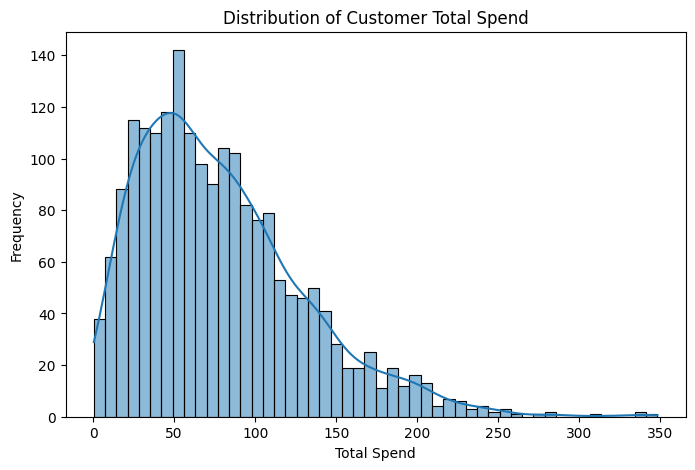

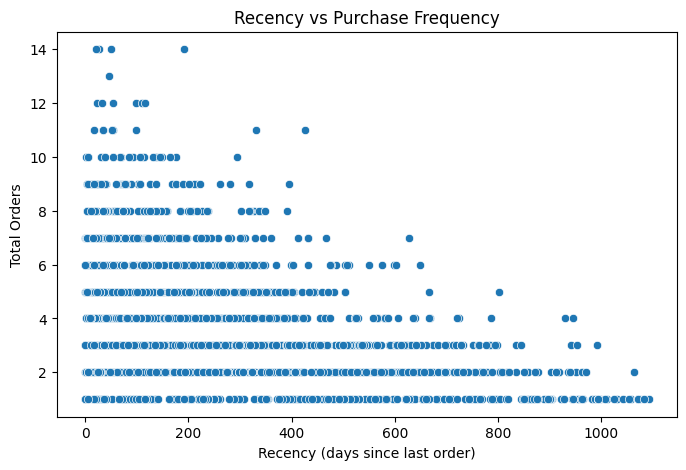

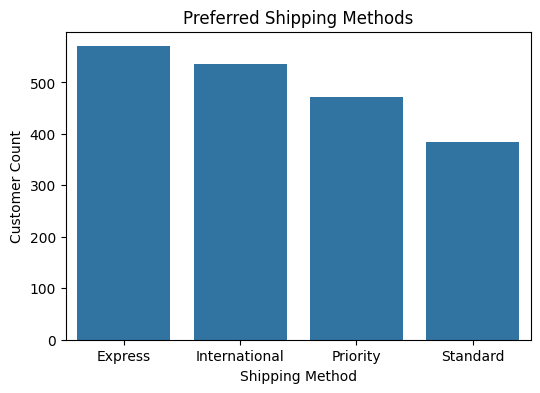

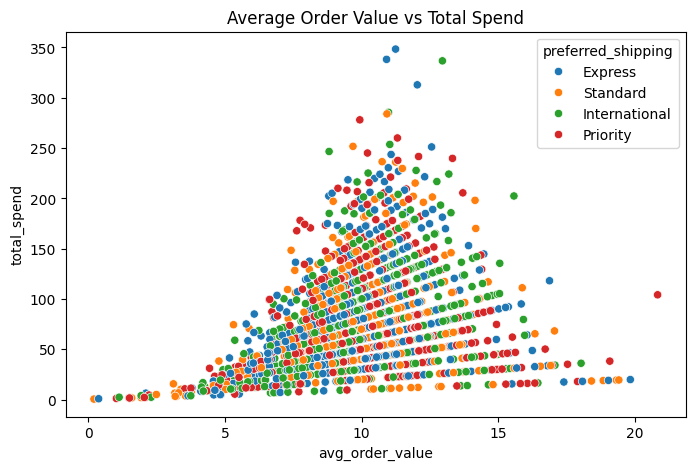

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total spend distribution
plt.figure(figsize=(8,5))
sns.histplot(customer_metrics['total_spend'], bins=50, kde=True)
plt.title("Distribution of Customer Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

# Purchase frequency vs. Recency
plt.figure(figsize=(8,5))
sns.scatterplot(x='recency_days', y='total_orders', data=customer_metrics)
plt.title("Recency vs Purchase Frequency")
plt.xlabel("Recency (days since last order)")
plt.ylabel("Total Orders")
plt.show()

# Preferred shipping method popularity
plt.figure(figsize=(6,4))
sns.countplot(data=customer_metrics, x='preferred_shipping', order=customer_metrics['preferred_shipping'].value_counts().index)
plt.title("Preferred Shipping Methods")
plt.xlabel("Shipping Method")
plt.ylabel("Customer Count")
plt.show()

# Average order value vs total spend
plt.figure(figsize=(8,5))
sns.scatterplot(x="avg_order_value", y="total_spend", data=customer_metrics, hue="preferred_shipping")
plt.title("Average Order Value vs Total Spend")
plt.show()


In [47]:
import numpy as np

# Define churn threshold (e.g., 180 days)
churn_threshold = 180
customer_metrics['churn'] = np.where(customer_metrics['recency_days'] > churn_threshold, 1, 0)

print(customer_metrics['churn'].value_counts())


churn
1    1061
0     901
Name: count, dtype: int64


In [48]:
customer_metrics

,customer_id,total_orders,total_spend,avg_order_value,purchase_frequency,unique_books,total_order_lines,avg_shipping_cost,preferred_shipping,recency_days,churn
0,1,3,50.10,8.350000,6,6,6,15.600000,Express,596,1
1,2,1,28.69,14.345000,2,2,2,5.900000,Standard,434,1
2,3,3,30.77,5.128333,6,6,6,15.600000,Express,365,1
3,4,6,127.89,9.837692,13,13,13,16.053846,Express,20,0
4,5,3,62.79,10.465000,6,6,6,8.900000,Express,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1957,1996,4,39.32,7.864000,5,5,5,8.300000,Standard,40,0
1958,1997,2,50.70,12.675000,4,4,4,16.700000,International,913,1
1959,1998,2,10.42,5.210000,2,2,2,24.500000,International,970,1
1960,1999,11,283.95,10.921154,26,26,26,9.776923,Standard,52,0


In [49]:
customer_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1962 non-null   int64  
 1   total_orders        1962 non-null   int64  
 2   total_spend         1962 non-null   float64
 3   avg_order_value     1962 non-null   float64
 4   purchase_frequency  1962 non-null   int64  
 5   unique_books        1962 non-null   int64  
 6   total_order_lines   1962 non-null   int64  
 7   avg_shipping_cost   1962 non-null   float64
 8   preferred_shipping  1962 non-null   object 
 9   recency_days        1962 non-null   int64  
 10  churn               1962 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 168.7+ KB


In [51]:
from sklearn.preprocessing import StandardScaler
import joblib

features = ['total_orders', 'total_spend', 'avg_order_value', 'recency_days']
X = customer_metrics[features]
y = customer_metrics['churn']                # Target column

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Save the fitted scaler
joblib.dump(scaler, "x_train.pkl")
joblib.dump(scaler, "x_test.pkl")
print("✅ Scaler saved as scaler.pkl")


✅ Scaler saved as scaler.pkl


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # churn (0/1)
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7380 - loss: 0.5919 - precision_1: 0.9210 - recall_1: 0.5637 - val_accuracy: 0.8524 - val_loss: 0.4730 - val_precision_1: 0.9936 - val_recall_1: 0.7324
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3990 - precision_1: 0.9676 - recall_1: 0.7736 - val_accuracy: 0.9033 - val_loss: 0.2862 - val_precision_1: 0.9944 - val_recall_1: 0.8263
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.2404 - precision_1: 0.9814 - recall_1: 0.8691 - val_accuracy: 0.9542 - val_loss: 0.1656 - val_precision_1: 0.9949 - val_recall_1: 0.9202
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9452 - loss: 0.1693 - precision_1: 0.9715 - recall_1: 0.9257 - val_accuracy: 0.9695 - val_loss: 0.1134 - val_precision_1: 1.0000 - val_recall_1: 0.9437
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.1229 - precision_1: 0.9792 - recall_1: 0.9422 - val_accur

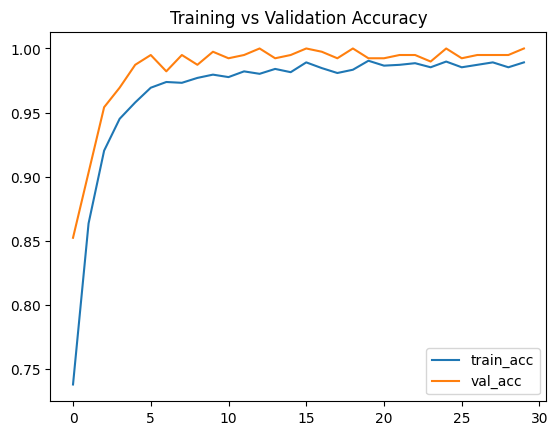

Test Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [55]:
import matplotlib.pyplot as plt

# Accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate on test
loss, acc, prec, rec = model.evaluate(X_test, y_test, verbose=0)
f1 = 2 * (prec * rec) / (prec + rec)

print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


In [57]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[180   0]
 [  0 213]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       213

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



In [56]:
y_pred_probs = model.predict(X_test)
y_pred_probs[:10]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[1.1045226e-02],
       [1.8284696e-06],
       [4.1538315e-05],
       [1.0000000e+00],
       [9.9939060e-01],
       [9.9998426e-01],
       [4.8449887e-03],
       [1.8225986e-08],
       [9.9938828e-01],
       [9.9999982e-01]], dtype=float32)

In [58]:
y_test[:10]

1335    0
1580    0
1023    0
1537    1
1843    1
641     1
266     0
995     0
1617    1
1544    1
Name: churn, dtype: int64

In [59]:
yp = []
for element in y_pred_probs:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)    

In [60]:
yp[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 1, 1]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       213

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

Confusion Matrix:
 [[180   0]
 [  0 213]]


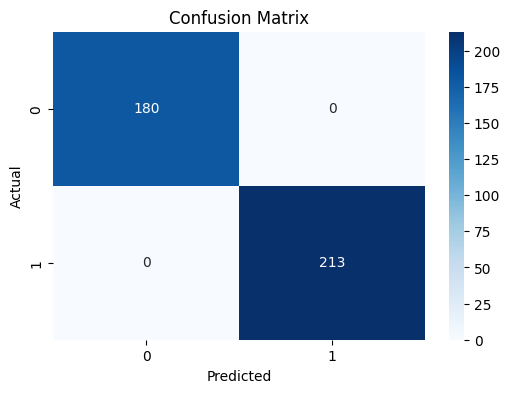

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
import joblib

# Save model
joblib.dump(model, "churn_model.pkl")


['churn_model.pkl']

In [63]:
joblib.dump(list(X.columns), "feature_columns.pkl")


['feature_columns.pkl']

In [65]:
# Preferred Keras 3 format
model.save("churn_model.keras")


In [67]:
model.save("churn_ann_model.h5")


In [69]:
import joblib

joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [66]:
customer_metrics.to_csv("customer_metrics.csv",index=False)

In [68]:
df.to_csv("transactions.csv",index=False)